In [1]:
import sympy as smp
import numpy as np
import pandas as pd
import scipy.integrate

import matplotlib.pyplot as plt
import scipy.constants as const

from sympy.plotting import plot


In [2]:

t, E = smp.symbols('t E')
s = 4*E*E
M, Gamma = smp.symbols('M Gamma')
pi, alpha = smp.symbols('pi alpha')

In [3]:
Lambda = smp.symbols('Lambda')
a, b = smp.symbols('a b')
s_caret = s / Lambda / Lambda
F = (1 + a*s_caret) / (1 - b*s_caret + a*s_caret*s_caret)

In [4]:
dsigma = 4 * pi * alpha * Gamma / pow(M,3) * F*F/s * \
         (1 + 2*t/s - 2*M*M/s + 2*t*t/s/s - 2*M*M*t/s/s + M*M*M*M/s/s)

In [5]:
dsigma

Gamma*alpha*pi*(4*E**2*a/Lambda**2 + 1)**2*(1 - M**2/(2*E**2) + t/(2*E**2) + M**4/(16*E**4) - M**2*t/(8*E**4) + t**2/(8*E**4))/(E**2*M**3*(16*E**4*a/Lambda**4 - 4*E**2*b/Lambda**2 + 1)**2)

In [6]:
a_ = 0.003
b_ = 0.090
Lambda_ = 250
M_ = 980
Gamma_ = 0.30*1e-3

In [7]:
E_ = 600

In [8]:
dsigma = dsigma.subs(a,a_).subs(b,b_).subs(Lambda,Lambda_).subs(M,M_).subs(Gamma,Gamma_)
dsigma = dsigma.subs(pi,const.pi).subs(alpha,const.alpha)

dsigma = dsigma.subs(E,E_)
def dsigma_fun(T):
    return dsigma.subs(t,T) 

In [9]:
#pl = plot(dsigma.subs(E,1e3))

In [10]:
#x0 = 
#x1 = 
x = np.arange(-4000000, 1000000, 10000)
df = pd.DataFrame(x, columns=['t'])
df["dsigma"] = df["t"].apply(dsigma_fun)

In [11]:
df.head()

t                dsigma
0 -4000000  1.17974837613259e-18
1 -3990000  1.17350717953536e-18
2 -3980000  1.16728260308246e-18
3 -3970000  1.16107464677389e-18
4 -3960000  1.15488331060964e-18

In [12]:
df.info()
df = df.astype('float64')
df.describe().transpose()\

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
t         500 non-null int64
dsigma    500 non-null object
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


count          mean           std           min           25%  \
t       500.0 -1.505000e+06  1.444818e+06 -4.000000e+06 -2.752500e+06   
dsigma  500.0  3.109263e-19  3.410697e-19  4.778631e-21  3.749106e-20   

                 50%           75%           max  
t      -1.505000e+06 -2.575000e+05  9.900000e+05  
dsigma  1.378026e-19  5.294500e-19  1.179748e-18

In [13]:
#plt.plot(df["t"],df["dsigma"])

In [14]:
M_E = 0.511
E_E = E_
M_H = M_
E_H = E_E + (M_H*M_H) / (4 * E_E)
p_e = np.sqrt( E_E*E_E - M_E*M_E )

def distM(a, b) :     
    return (a[3]-b[3])**2 - sum( ( np.array(a[:3]) - np.array(b[:3]) )**2 )

def convM(a, b) :  
    return a[3]*b[3] - sum( np.array(a[:3]) * np.array(b[:3]) )
    #return a[0]*b[0] - sum( np.array(a[1:]) * np.array(b[1:]) )

def tFromAngles(r, theta, phi):
    p_e = np.sqrt( E_E*E_E - M_E*M_E )
    p_minus = np.array([ 0.0,  0.0,   p_e, E_E ])
    p_plus  = np.array([ 0.0,  0.0,  -p_e, E_E ])
    q = ( r * np.sin(theta) * np.cos(phi),
          r * np.sin(theta) * np.sin(phi),
          r * np.cos(theta),
          E_H )
    if (theta == 0 and phi == 0):
        print("p_minus ", p_minus)
        print("q ", q)
        print(convM(p_minus - q, p_minus - q))
    return convM(p_minus - q, p_minus - q)
    

def sFromAngles():
    p_e = np.sqrt( E_E*E_E - M_E*M_E )
    p_minus = np.array([ 0.0,  0.0,   p_e, E_E ])
    p_plus  = np.array([ 0.0,  0.0,  -p_e, E_E ])
    
    return convM(p_minus + p_plus, p_minus + p_plus)

theta       phi   t
0  3.141593  0.000000 NaN
1  3.141593  0.063467 NaN
2  3.141593  0.126933 NaN
3  3.141593  0.190400 NaN
4  3.141593  0.253866 NaN

theta       phi   t
9995    0.0  6.029319 NaN
9996    0.0  6.092786 NaN
9997    0.0  6.156252 NaN
9998    0.0  6.219719 NaN
9999    0.0  6.283185 NaN

p_minus  [  0.          0.        599.9997824 600.       ]
q  (0.0, 0.0, 199.83333333333366, 1000.1666666666667)
0.174153184867464


theta       phi              t                dsigma
0  3.141593  0.000000 -479599.651911  9.55724056806322e-21
1  3.141593  0.063467 -479599.651911  9.55724056806322e-21
2  3.141593  0.126933 -479599.651911  9.55724056806322e-21
3  3.141593  0.190400 -479599.651911  9.55724056806322e-21
4  3.141593  0.253866 -479599.651911  9.55724056806322e-21

theta       phi         t                dsigma
9995    0.0  6.029319  0.174153  9.55726138206599e-21
9996    0.0  6.092786  0.174153  9.55726138206599e-21
9997    0.0  6.156252  0.174153  9.55726138206599e-21
9998    0.0  6.219719  0.174153  9.55726138206599e-21
9999    0.0  6.283185  0.174153  9.55726138206599e-21

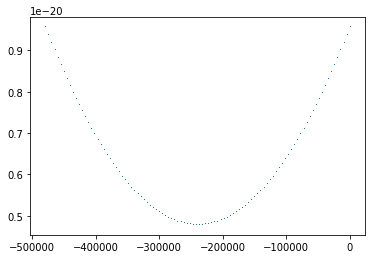

In [15]:
arg = np.linspace(0, 1, 1000)
r     = np.sqrt( E_H**2 - M_H**2 )
#theta = np.arccos(2 * arg - 1)
#phi   = arg * 2 * np.pi

angles = np.mgrid[0:1:100j, 0:1:100j].reshape(2,-1).T

#d = {"theta": theta, "phi":phi}
#df2 = pd.DataFrame(d)

df2 = pd.DataFrame(angles, columns=["theta", "phi"])
df2["t"] = np.nan
df2["theta"] = df2["theta"].apply( lambda x: np.arccos(2 * x - 1) )
df2[ "phi" ] = df2[ "phi" ].apply( lambda x: x * 2 * np.pi )
display(df2.head())
display(df2.tail())

#arr_t = np.array([])
#for i in range( len(df2) ):
#    np.append(arr_t, tFromAngles(r, df2["theta"][i], df2["phi"][i]) )
    
#ser_t = df2.apply(lambda x: tFromAngles(r, x.theta, x.phi), axis=1)
#df2["t"] = pd.Series(ser_t)
for i in range(len(df2)):
    df2["t"][i] = tFromAngles(r, df2["theta"][i], df2["phi"][i])
df2.head()

df2["dsigma"] = df2["t"].apply(dsigma_fun)
plt.plot(df2["t"],df2["dsigma"], ",")

display(df2.head())
display(df2.tail())

In [16]:
df2.info()
df2 = df2.astype('float64')
df2.describe(include = 'all').transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
theta     10000 non-null float64
phi       10000 non-null float64
t         10000 non-null float64
dsigma    10000 non-null object
dtypes: float64(3), object(1)
memory usage: 312.6+ KB


count          mean           std           min           25%  \
theta   10000.0  1.570796e+00  7.000063e-01  0.000000e+00  1.047168e+00   
phi     10000.0  3.141593e+00  1.832121e+00  0.000000e+00  1.570796e+00   
t       10000.0 -2.397997e+05  1.398470e+05 -4.795997e+05 -3.596997e+05   
dsigma  10000.0  6.403681e-21  1.453347e-21  4.779115e-21  5.083357e-21   

                 50%           75%           max  
theta   1.570796e+00  2.094425e+00  3.141593e+00  
phi     3.141593e+00  4.712389e+00  6.283185e+00  
t      -2.397997e+05 -1.198998e+05  1.741532e-01  
dsigma  5.998027e-21  7.521176e-21  9.557261e-21

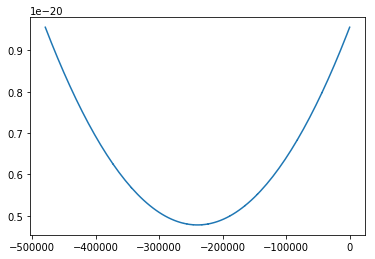

In [17]:
plt.plot(df2["t"],df2["dsigma"])

In [18]:
M_E = 0.511
E_E = E_
M_H = M_
E_H = E_E + (M_H*M_H) / (4 * E_E)
p_e = np.sqrt( E_E*E_E - M_E*M_E )

E_E*E_E + E_H*E_H - 2*E_E*E_H - p_e

159533.3613287121

In [19]:
t_max = df2["t"].max()
t_min = df2["t"].min()
print( "max ", dsigma_fun( t_max ) )
print( "min ", dsigma_fun( t_min ) )

max  9.55726138206599e-21
min  9.55724056806322e-21


In [20]:
M_H*M_H - (4 * E_E * E_E)

-479600

In [21]:
smp.integrate(dsigma, t)

2.77002405430117e-32*t**3 + 1.99275530466426e-26*t**2 + 9.55725444116981e-21*t

In [22]:
smp.integrate(dsigma, (t, t_min, t_max))

3.05577115764597e-15

In [23]:
scipy.integrate.quad(dsigma_fun, t_min, t_max)

(3.0557711576459706e-15, 3.3925874972040257e-29)

In [24]:
#грубая графическая оценка сечения
( df2["t"].max() - df2["t"].min() ) * df2["dsigma"].max()

4.583660896490566e-15

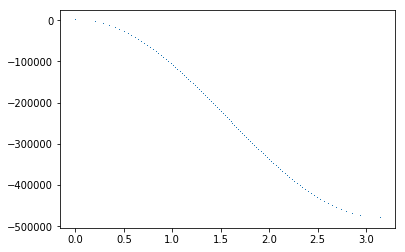

In [25]:
plt.plot(df2["theta"],df2["t"], ",")


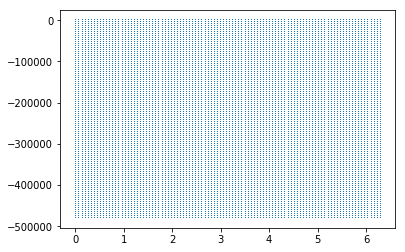

In [26]:

plt.plot(df2["phi"],df2["t"], ",")

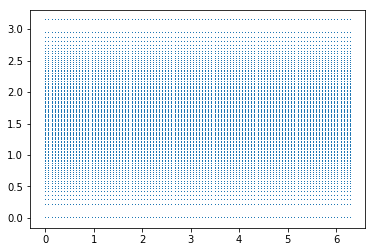

In [27]:
plt.plot(df2["phi"],df2["theta"], ",")

In [28]:
display(df2[:200])

theta       phi              t        dsigma
0    3.141593  0.000000 -479599.651911  9.557241e-21
1    3.141593  0.063467 -479599.651911  9.557241e-21
2    3.141593  0.126933 -479599.651911  9.557241e-21
3    3.141593  0.190400 -479599.651911  9.557241e-21
4    3.141593  0.253866 -479599.651911  9.557241e-21
5    3.141593  0.317333 -479599.651911  9.557241e-21
6    3.141593  0.380799 -479599.651911  9.557241e-21
7    3.141593  0.444266 -479599.651911  9.557241e-21
8    3.141593  0.507732 -479599.651911  9.557241e-21
9    3.141593  0.571199 -479599.651911  9.557241e-21
10   3.141593  0.634665 -479599.651911  9.557241e-21
11   3.141593  0.698132 -479599.651911  9.557241e-21
12   3.141593  0.761598 -479599.651911  9.557241e-21
13   3.141593  0.825065 -479599.651911  9.557241e-21
14   3.141593  0.888531 -479599.651911  9.557241e-21
15   3.141593  0.951998 -479599.651911  9.557241e-21
16   3.141593  1.015464 -479599.651911  9.557241e-21
17   3.141593  1.078931 -479599.651911  9.557241e-21
18   3.141593  1.142397 -479599.651911  9.557241e-21
19   3.141593  1.205864 -479599.651911  9.557241e-21
20   3.141593  1.269330 -479599.651911  9.557241e-21
21   3.141593  1.332797 -479599.651911  9.557241e-21
22   3.141593  1.396263 -479599.651911  9.557241e-21
23   3.141593  1.459730 -479599.651911  9.557241e-21
24   3.141593  1.523196 -479599.651911  9.557241e-21
25   3.141593  1.586663 -479599.651911  9.557241e-21
26   3.141593  1.650129 -479599.651911  9.557241e-21
27   3.141593  1.713596 -479599.651911  9.557241e-21
28   3.141593  1.777063 -479599.651911  9.557241e-21
29   3.141593  1.840529 -479599.651911  9.557241e-21
..        ...       ...            ...           ...
170  2.940245  4.442656 -474755.209224  9.366115e-21
171  2.940245  4.506123 -474755.209224  9.366115e-21
172  2.940245  4.569589 -474755.209224  9.366115e-21
173  2.940245  4.633056 -474755.209224  9.366115e-21
174  2.940245  4.696522 -474755.209224  9.366115e-21
175  2.940245  4.759989 -474755.209224  9.366115e-21
176  2.940245  4.823455 -474755.209224  9.366115e-21
177  2.940245  4.886922 -474755.209224  9.366115e-21
178  2.940245  4.950388 -474755.209224  9.366115e-21
179  2.940245  5.013855 -474755.209224  9.366115e-21
180  2.940245  5.077321 -474755.209224  9.366115e-21
181  2.940245  5.140788 -474755.209224  9.366115e-21
182  2.940245  5.204254 -474755.209224  9.366115e-21
183  2.940245  5.267721 -474755.209224  9.366115e-21
184  2.940245  5.331188 -474755.209224  9.366115e-21
185  2.940245  5.394654 -474755.209224  9.366115e-21
186  2.940245  5.458121 -474755.209224  9.366115e-21
187  2.940245  5.521587 -474755.209224  9.366115e-21
188  2.940245  5.585054 -474755.209224  9.366115e-21
189  2.940245  5.648520 -474755.209224  9.366115e-21
190  2.940245  5.711987 -474755.209224  9.366115e-21
191  2.940245  5.775453 -474755.209224  9.366115e-21
192  2.940245  5.838920 -474755.209224  9.366115e-21
193  2.940245  5.902386 -474755.209224  9.366115e-21
194  2.940245  5.965853 -474755.209224  9.366115e-21
195  2.940245  6.029319 -474755.209224  9.366115e-21
196  2.940245  6.092786 -474755.209224  9.366115e-21
197  2.940245  6.156252 -474755.209224  9.366115e-21
198  2.940245  6.219719 -474755.209224  9.366115e-21
199  2.940245  6.283185 -474755.209224  9.366115e-21

[200 rows x 4 columns]

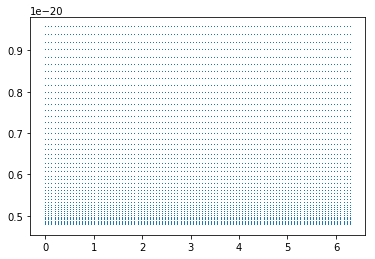

In [29]:
plt.plot(df2["phi"],df2["dsigma"], ",")

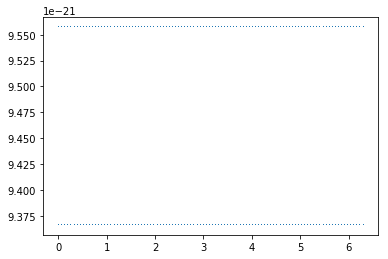

In [30]:
plt.plot(df2["phi"][:200],df2["dsigma"][:200], ",")

In [31]:
display( df2[df2["dsigma"] > 1.14e-22][:200] ) 
df2[df2["dsigma"] < 1.14e-22][:200]

theta       phi              t        dsigma
0    3.141593  0.000000 -479599.651911  9.557241e-21
1    3.141593  0.063467 -479599.651911  9.557241e-21
2    3.141593  0.126933 -479599.651911  9.557241e-21
3    3.141593  0.190400 -479599.651911  9.557241e-21
4    3.141593  0.253866 -479599.651911  9.557241e-21
5    3.141593  0.317333 -479599.651911  9.557241e-21
6    3.141593  0.380799 -479599.651911  9.557241e-21
7    3.141593  0.444266 -479599.651911  9.557241e-21
8    3.141593  0.507732 -479599.651911  9.557241e-21
9    3.141593  0.571199 -479599.651911  9.557241e-21
10   3.141593  0.634665 -479599.651911  9.557241e-21
11   3.141593  0.698132 -479599.651911  9.557241e-21
12   3.141593  0.761598 -479599.651911  9.557241e-21
13   3.141593  0.825065 -479599.651911  9.557241e-21
14   3.141593  0.888531 -479599.651911  9.557241e-21
15   3.141593  0.951998 -479599.651911  9.557241e-21
16   3.141593  1.015464 -479599.651911  9.557241e-21
17   3.141593  1.078931 -479599.651911  9.557241e-21
18   3.141593  1.142397 -479599.651911  9.557241e-21
19   3.141593  1.205864 -479599.651911  9.557241e-21
20   3.141593  1.269330 -479599.651911  9.557241e-21
21   3.141593  1.332797 -479599.651911  9.557241e-21
22   3.141593  1.396263 -479599.651911  9.557241e-21
23   3.141593  1.459730 -479599.651911  9.557241e-21
24   3.141593  1.523196 -479599.651911  9.557241e-21
25   3.141593  1.586663 -479599.651911  9.557241e-21
26   3.141593  1.650129 -479599.651911  9.557241e-21
27   3.141593  1.713596 -479599.651911  9.557241e-21
28   3.141593  1.777063 -479599.651911  9.557241e-21
29   3.141593  1.840529 -479599.651911  9.557241e-21
..        ...       ...            ...           ...
170  2.940245  4.442656 -474755.209224  9.366115e-21
171  2.940245  4.506123 -474755.209224  9.366115e-21
172  2.940245  4.569589 -474755.209224  9.366115e-21
173  2.940245  4.633056 -474755.209224  9.366115e-21
174  2.940245  4.696522 -474755.209224  9.366115e-21
175  2.940245  4.759989 -474755.209224  9.366115e-21
176  2.940245  4.823455 -474755.209224  9.366115e-21
177  2.940245  4.886922 -474755.209224  9.366115e-21
178  2.940245  4.950388 -474755.209224  9.366115e-21
179  2.940245  5.013855 -474755.209224  9.366115e-21
180  2.940245  5.077321 -474755.209224  9.366115e-21
181  2.940245  5.140788 -474755.209224  9.366115e-21
182  2.940245  5.204254 -474755.209224  9.366115e-21
183  2.940245  5.267721 -474755.209224  9.366115e-21
184  2.940245  5.331188 -474755.209224  9.366115e-21
185  2.940245  5.394654 -474755.209224  9.366115e-21
186  2.940245  5.458121 -474755.209224  9.366115e-21
187  2.940245  5.521587 -474755.209224  9.366115e-21
188  2.940245  5.585054 -474755.209224  9.366115e-21
189  2.940245  5.648520 -474755.209224  9.366115e-21
190  2.940245  5.711987 -474755.209224  9.366115e-21
191  2.940245  5.775453 -474755.209224  9.366115e-21
192  2.940245  5.838920 -474755.209224  9.366115e-21
193  2.940245  5.902386 -474755.209224  9.366115e-21
194  2.940245  5.965853 -474755.209224  9.366115e-21
195  2.940245  6.029319 -474755.209224  9.366115e-21
196  2.940245  6.092786 -474755.209224  9.366115e-21
197  2.940245  6.156252 -474755.209224  9.366115e-21
198  2.940245  6.219719 -474755.209224  9.366115e-21
199  2.940245  6.283185 -474755.209224  9.366115e-21

[200 rows x 4 columns]

Empty DataFrame
Columns: [theta, phi, t, dsigma]
Index: []

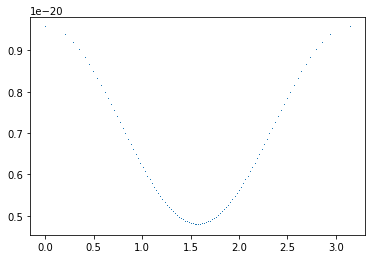

In [32]:
plt.plot(df2["theta"],df2["dsigma"], ",")